### Part - 1

In [117]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import tree
warnings.simplefilter(action='ignore', category=FutureWarning)
df=pd.read_csv(r"/Users/Arjunsahas/Downloads/PlayTennis.csv")

In [118]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [119]:
df['play']=df['play'].replace({"yes":0,"no":1})

In [120]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,1
1,sunny,hot,high,True,1
2,overcast,hot,high,False,0
3,rainy,mild,high,False,0
4,rainy,cool,normal,False,0
5,rainy,cool,normal,True,1
6,overcast,cool,normal,True,0
7,sunny,mild,high,False,1
8,sunny,cool,normal,False,0
9,rainy,mild,normal,False,0


In [121]:
outlook=pd.get_dummies(df["outlook"],drop_first=True)
temp=pd.get_dummies(df["temp"],drop_first=True)
humidity=pd.get_dummies(df["humidity"],drop_first=True)
windy=pd.get_dummies(df["windy"],drop_first=True)

In [122]:
df.drop(columns=["outlook","temp","humidity",'windy'],inplace=True)

In [123]:
df=pd.concat([df,outlook,temp,humidity,windy],axis=1)

In [124]:
X=df.drop(columns=['play'],axis=0)
y=df['play']

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)

In [126]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
acc_score=classification_report(y_test,pred)
print(acc_score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.25, 0.625, 'X[5] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.375, 0.375, 'X[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[4] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

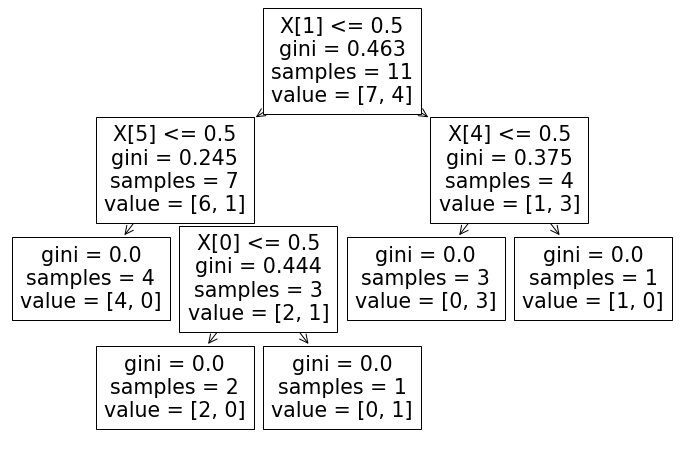

In [127]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt)

In [128]:
fn=['outlook','temp','humidity','windy']
cn=['yes','no']

### part - 2

In [129]:
import pandas as pd
winequality_df=pd.read_csv(r"/Users/Arjunsahas/Downloads/winequality-red.csv")

In [130]:
winequality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [131]:
winequality_df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [132]:
labels = ['bad', 'decent', 'excellent']
bins = [0, 4, 6, 10]
winequality_df['quality_label'] = pd.cut(winequality_df['quality'], bins=bins, labels=labels)

In [133]:
winequality_df.drop('quality', axis=1, inplace=True)
winequality_df['quality_label'] = winequality_df['quality_label'].replace({'bad': 0, 'decent': 1, 'excellent': 2})

In [134]:
winequality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [135]:
X=winequality_df.drop(columns=["quality_label"])
y=winequality_df[["quality_label"]]

In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [216]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_df=rfc.predict(X_test)
acc_score=accuracy_score(y_test,pred_df)
print("accuracy score of RFC without hyperparameter tuning:",acc_score)

accuracy score of RFC without hyperparameter tuning: 0.846875


/var/folders/zb/xf_hg8m942g5tpgyzrzz6m5w0000gn/T/ipykernel_23898/1020010419.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


### Part-3

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
rf_model=RandomForestClassifier()

In [140]:
random_grid = {'n_estimators': list(range(100,2000,200)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(10,100,25)),
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,3,5],
               'bootstrap': [True, False]}

In [141]:
best_random_model=RandomizedSearchCV(rf_model,param_distributions=random_grid,cv=3,n_jobs=5)

In [142]:
best_random_model.fit(X_train,y_train)

/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]})

In [143]:
print(best_random_model.best_estimator_)

RandomForestClassifier(max_depth=85, min_samples_split=10, n_estimators=1100)


In [220]:
from sklearn.model_selection import GridSearchCV

In [153]:
random_grid = {'n_estimators': [best_random_model.best_params_['n_estimators']-100,
                                best_random_model.best_params_['n_estimators'],
                               best_random_model.best_params_['n_estimators']+100],
               'max_features':[best_random_model.best_params_['n_estimators'],
                               best_random_model.best_params_['n_estimators']+2],
               'min_samples_split': [best_random_model.best_params_['min_samples_split']-1,
                                    best_random_model.best_params_['min_samples_split']],
               'min_samples_leaf': [best_random_model.best_params_['min_samples_leaf']-1,
                                   best_random_model.best_params_['min_samples_leaf']],
               'max_depth':[best_random_model.best_params_['max_depth'],
                           best_random_model.best_params_['max_depth']+1],
                                       
               'bootstrap': [True, False]}

In [154]:
rf_model=RandomForestClassifier()

In [155]:
grid_model=GridSearchCV(rf_model,param_grid=random_grid,cv=2,n_jobs =1, verbose = 2)

In [156]:
grid_model.fit(X_train,y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   2.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   2.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.7s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.7s
[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.7s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=85, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.7s
[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.8s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1100, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.7s
[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=9, n_estimators=1200; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1000; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1100; total time=   0.2s
[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=0, min_samples_split=10, n_estimators=1200; total time=   0.2s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=9, n_estimators=1200; total time=   3.7s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.0s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.1s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.3s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=   3.4s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.6s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=False, max_depth=86, max_features=1102, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.7s


/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/Users/arjunsahas/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_b

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_depth': [85, 86],
                         'max_features': [1100, 1102],
                         'min_samples_leaf': [0, 1],
                         'min_samples_split': [9, 10],
                         'n_estimators': [1000, 1100, 1200]},
             verbose=2)

In [222]:
best_grid = grid_model.best_estimator_
pred_val=best_grid.predict(X_test)
acc_score=accuracy_score(y_test,pred_val)
print(acc_score)

0.85


### Do you noticed any accuracy improvements on your model? 

### Yes, As we can see there was a slight increase in accuracy after performing hyperparameter tuning and now our model will perform more accurate then and gives effecitive result's. This improvement can be related to the use of Grid Search to identify the ideal set of hyperparameters, which can improve the model's ability to fit training data and make predictions about test data.